<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [41]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [60]:
missing_value = df.isnull().sum()
missing_value

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


💡Il n'y a pas de donnees inconsistantes dans la colonne 'Country' notamment car il s'agit d'un sondage et les reponses sont pre-etablies. Par contre, il y a 185 pays participants, et tous ces pays n'ont pas le meme poids dans le sondage.
L'obejctif est de definir les pays qui contribuent le plus au sondage (ex. 80% des repondants) et classer les autres pays sous-representes par la categorie 'Other'

>☑️**Explorer les donnees**

In [43]:
#Display the content of each columns
#since it is a survey, it should not have too many inconsistency
print(df['Country'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [67]:
#check for NaN
country_nan = df['Country'].isnull().sum()
print("Number of missing values:",country_nan)

Number of missing values: 6507


In [45]:
# Comptage des occurrences dans une colonne donnée
occurrences = df['Country'].value_counts()
print(occurrences)

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


In [46]:
# Comptage des valeurs uniques dans une colonne spécifique
unique_count = df['Country'].nunique()
print(f"Nombre de valeurs uniques : {unique_count}")

Nombre de valeurs uniques : 185


In [47]:
country_counts = df['Country'].value_counts(normalize=True)  # Proportions pour chaque pays
print(country_counts)

Country
United States of America                                0.188274
Germany                                                 0.083947
India                                                   0.071797
United Kingdom of Great Britain and Northern Ireland    0.054709
Ukraine                                                 0.045342
                                                          ...   
Micronesia, Federated States of...                      0.000017
Nauru                                                   0.000017
Chad                                                    0.000017
Djibouti                                                0.000017
Solomon Islands                                         0.000017
Name: proportion, Length: 185, dtype: float64


In [48]:
threshold = 0.75  # Par exemple, 75 % des réponses
cumulative_contribution = country_counts.cumsum()  # Somme cumulative
top_countries = cumulative_contribution[cumulative_contribution <= threshold].index
print(top_countries)

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'France', 'Canada', 'Poland', 'Netherlands', 'Brazil', 'Italy',
       'Australia', 'Spain', 'Sweden', 'Russian Federation', 'Switzerland',
       'Austria', 'Czech Republic', 'Israel', 'Turkey'],
      dtype='object', name='Country')


In [49]:
threshold = 0.80  
cumulative_contribution = country_counts.cumsum()  # Somme cumulative
top_countries = cumulative_contribution[cumulative_contribution <= threshold].index
print(top_countries)

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'France', 'Canada', 'Poland', 'Netherlands', 'Brazil', 'Italy',
       'Australia', 'Spain', 'Sweden', 'Russian Federation', 'Switzerland',
       'Austria', 'Czech Republic', 'Israel', 'Turkey', 'Belgium', 'Denmark',
       'Portugal', 'Norway', 'Romania', 'Pakistan'],
      dtype='object', name='Country')


>**☑️Exploration de la Colonne EdLevel**

In [62]:
print(df['EdLevel'].unique())

['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


In [63]:
print(df['EdLevel'].isnull().sum())

4653


In [68]:
# Comptage des occurrences dans une colonne donnée
occurrences = df['EdLevel'].value_counts()
print(occurrences)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Unknown                                                                                4653
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


👍Since it is a survey, response are pre-defined, so few chances of inconsistency within dataset

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


>**☑️Standardisation de la colonne EdLevel**

In [69]:
# Remplacement des NaN par 'Unknown' 
df['EdLevel'] = df['EdLevel'].fillna('Unknown').astype(str) #convert to string pour etre reconnu dans la fonction

edlevel = ['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else','Unknown']

def simplify_edlevel(edlevel):
    if 'Professional degree' in edlevel:
        return 'Professional degree'
    elif 'Bachelor' in edlevel:  # Utilisez une sous-chaîne
        return 'Bachelor\'s degree'
    elif 'Master' in edlevel:  # Simplifiez avec une sous-chaîne
        return 'Master\'s degree'
    elif 'Secondary school' in edlevel:
        return 'Secondary school'
    elif 'Associate degree' in edlevel:
        return 'Associate degree'
    elif 'Primary' in edlevel:
        return 'Primary school'
    elif 'Unknown' in edlevel:
        return 'Unknown'
    else:
        return 'Other'

# Appliquer la simplification
df['EdLevel_standardized'] = df['EdLevel'].apply(simplify_edlevel)

In [70]:
print(df['EdLevel_standardized'].unique())

['Primary school' "Bachelor's degree" "Master's degree" 'Other'
 'Secondary school' 'Professional degree' 'Associate degree' 'Unknown']


In [71]:
print(df['EdLevel_standardized'].isnull().sum())

0


In [72]:
occurrences = df['EdLevel_standardized'].value_counts()
print(occurrences)

EdLevel_standardized
Bachelor's degree      24942
Master's degree        15557
Other                   8583
Secondary school        5793
Unknown                 4653
Professional degree     2970
Associate degree        1793
Primary school          1146
Name: count, dtype: int64


➡️NaN are now counted as 'Unknown' and a category 'Other' was created

>**☑️Standardisation de la colonne Country**

In [78]:
# Remplacement des NaN par 'Unknown'
df['Country'] = df['Country'].fillna('Unknown').astype(str) 

#liste des payes contribuant a 80% du sondage
countries =['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'France', 'Canada', 'Poland', 'Netherlands', 'Brazil', 'Italy',
       'Australia', 'Spain', 'Sweden', 'Russian Federation', 'Switzerland',
       'Austria', 'Czech Republic', 'Israel', 'Turkey', 'Belgium', 'Denmark',
       'Portugal', 'Norway', 'Romania', 'Pakistan','Unknown']

def simplify_country(country):
    if country in countries:
        return country
    else:
        return 'Other'

# Appliquer la simplification
df['Country_standardized'] = df['Country'].apply(simplify_country)

In [79]:
print(df['Country_standardized'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Other' 'Poland' 'Switzerland' 'India' 'Germany' 'Italy' 'Ukraine'
 'Australia' 'Brazil' 'Austria' 'France' 'Romania' 'Turkey' 'Sweden'
 'Netherlands' 'Pakistan' 'Czech Republic' 'Russian Federation' 'Israel'
 'Belgium' 'Portugal' 'Spain' 'Denmark' 'Unknown']


In [80]:
occurrences = df['Country_standardized'].value_counts()
print(occurrences)

Country_standardized
Other                                                   12189
United States of America                                11095
Unknown                                                  6507
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                           

➡️NaN are now counted as 'Unknown' and a category 'Other' was created for the remaining 20%. 

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [81]:
print(df['Employment'].isnull().sum())

0


➡️No missing value to handle in this column

In [34]:
print(df['Employment'].unique())

['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but looking for work;Independent contr

In [83]:
# Comptage des valeurs uniques dans une colonne spécifique
unique_count = df['Employment'].nunique()
print(f"Nombre de valeurs uniques : {unique_count}")

Nombre de valeurs uniques : 110


In [84]:
# Fonction de simplification
def simplify_employment(status):
    if pd.isna(status):  # juste au cas ou mais il n'y a pas de NaN
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Application de la fonction
df['Employment_standardized'] = df['Employment'].apply(simplify_employment)

# Aperçu des résultats
print(df[['Employment', 'Employment_standardized']].head())

            Employment Employment_standardized
0  Employed, full-time      Employed full-time
1  Employed, full-time      Employed full-time
2  Employed, full-time      Employed full-time
3   Student, full-time                 Student
4   Student, full-time                 Student


In [85]:
print(df['Employment_standardized'].unique())

['Employed full-time' 'Student' 'Freelancer' 'Unemployed'
 'Employed part-time' 'Other']


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [ ]:
# Découper l'affichage des NaN par groupe de 10 colonnes
batch_size = 20  # Nombre de colonnes par groupe

for i in range(0, len(df.columns), batch_size):
    # Sélectionner un groupe de colonnes
    subset_cols = df.columns[i:i + batch_size]
    print(f"Colonnes {i + 1} à {min(i + batch_size, len(df.columns))} :")
    
    # Nombre de NaN par colonne dans ce groupe
    print(df[subset_cols].isna().sum())
    print("\n")  # Espacement entre les groupes pour plus de lisibilité

In [5]:
# Identifiez les colonnes avec des NaN
df_nan = df.isnull()

# Comptez les NaN dans chaque colonne
nan_count = df_nan.sum()

# Triez les colonnes par nombre décroissant de NaN
sorted_nan_count = nan_count.sort_values(ascending=False)

# Sélectionnez les 20 premières colonnes avec le plus de NaN
top_20_nan = sorted_nan_count.head(20)

# Affichez les résultats
print(top_20_nan)


AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
Knowledge_9                      37802
Frequency_3                      37727
Knowledge_8                      37679
ProfessionalTech                 37673
Knowledge_7                      37659
Knowledge_6                      37573
Knowledge_5                      37557
Knowledge_2                      37416
Knowledge_4                      37407
Knowledge_3                      37342
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [20]:
#numerical columns names
numeric_column_names = df.select_dtypes(include=['number']).columns
print(numeric_column_names)

Index(['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat'],
      dtype='object')


In [21]:
#list of numerical columns
numeric_columns = df.select_dtypes(include=['number'])

In [22]:
#calculate the mean and median
for column in numeric_columns.columns:
    mean_value = numeric_columns[column].mean()
    median_value = numeric_columns[column].median()
    print(f"Colonne : {column}")
    print(f"  Moyenne : {mean_value}")
    print(f"  Médiane : {median_value}")
    print()

Colonne : ResponseId
  Moyenne : 32719.0
  Médiane : 32719.0

Colonne : CompTotal
  Moyenne : 2.9638411381149976e+145
  Médiane : 110000.0

Colonne : WorkExp
  Moyenne : 11.46695663901814
  Médiane : 9.0

Colonne : JobSatPoints_1
  Moyenne : 18.5810939844496
  Médiane : 10.0

Colonne : JobSatPoints_4
  Moyenne : 7.5221396250808015
  Médiane : 0.0

Colonne : JobSatPoints_5
  Moyenne : 10.06085733229064
  Médiane : 0.0

Colonne : JobSatPoints_6
  Moyenne : 24.34323191850594
  Médiane : 20.0

Colonne : JobSatPoints_7
  Moyenne : 22.965220218690572
  Médiane : 15.0

Colonne : JobSatPoints_8
  Moyenne : 20.278165059750137
  Médiane : 10.0

Colonne : JobSatPoints_9
  Moyenne : 16.169432373709938
  Médiane : 5.0

Colonne : JobSatPoints_10
  Moyenne : 10.955713073005093
  Médiane : 0.0

Colonne : JobSatPoints_11
  Moyenne : 9.95394803871625
  Médiane : 0.0

Colonne : ConvertedCompYearly
  Moyenne : 86155.28726264134
  Médiane : 65000.0

Colonne : JobSat
  Moyenne : 6.9350408569662845
  Médiane

Choix entre moyenne ou mediane pour remplacer les NaN : 

Moyenne pour les colonnes 'JobSat' car majoritairement la mediane est de 0

Mediane pour la colonne CompTotal (la moyenne est improbable et indique un outlier majeur ou une reponse farfelue volontaire) et ConvertedCompYearly

In [23]:
column_fill_w_mean =['ResponseId', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11','JobSat']
column_fill_w_median =['CompTotal','ConvertedCompYearly']

# Fonction pour remplacer les NaN
def fill_nan(df, columns_mean, columns_median):
    for col in columns_mean:  # Remplacer par la moyenne
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())
    for col in columns_median:  # Remplacer par la médiane
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    return df  # Retour explicite du DataFrame modifié

# Application de la fonction
df = fill_nan(df, column_fill_w_mean, column_fill_w_median)

# Affichage des résultats
print(df.select_dtypes(include=['number']).isnull().sum())  # Vérifie les NaN restants

ResponseId             0
CompTotal              0
WorkExp                0
JobSatPoints_1         0
JobSatPoints_4         0
JobSatPoints_5         0
JobSatPoints_6         0
JobSatPoints_7         0
JobSatPoints_8         0
JobSatPoints_9         0
JobSatPoints_10        0
JobSatPoints_11        0
ConvertedCompYearly    0
JobSat                 0
dtype: int64


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [24]:
#define the most frequent value in RemoteWork
most_freq_remote = df['RemoteWork'].mode()[0]
most_freq_remote

'Hybrid (some remote, some in-person)'

In [25]:
#replace
df['RemoteWork']=df['RemoteWork'].fillna(most_freq_remote)
#check for missing value after replacement
print(df['RemoteWork'].isnull().sum())

0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [26]:
converted_min = df['ConvertedCompYearly'].min()
converted_max = df['ConvertedCompYearly'].max()
df['Norm_ConvertedCompYearly']=(df['ConvertedCompYearly']-converted_min)/(converted_max-converted_min)

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [41]:
# Trouver la valeur avec le maximum d'occurrences
peak_value = df['Norm_ConvertedCompYearly'].value_counts().idxmax()  # La valeur correspondant au pic
peak_frequency = df['Norm_ConvertedCompYearly'].value_counts().max()  # La fréquence maximale

print(f"Valeur du pic : {peak_value}")
print(f"Fréquence du pic : {peak_frequency}")

Valeur du pic : 0.0039983140388132775
Fréquence du pic : 42039


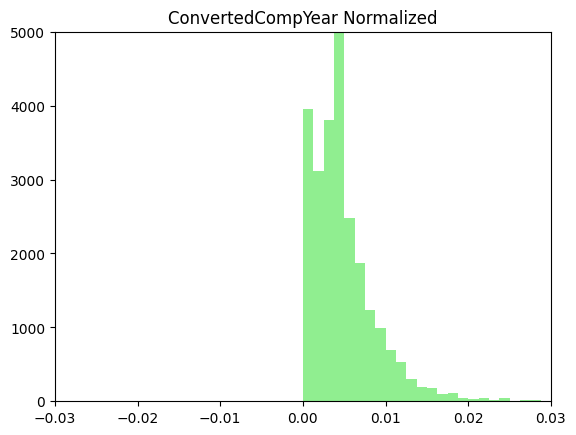

In [43]:
import matplotlib.pyplot as plt
#histogram of Normalized Min Max 'ConvertedCompYearly'
dist =df['Norm_ConvertedCompYearly']
plt.hist(dist, bins=800, color = 'lightgreen')
plt.title('ConvertedCompYear Normalized')
plt.xlim([-0.03, 0.03])
plt.ylim([0,5000])  #zoom pour voir la distribution
plt.show()

In [30]:
df['log_ConvertedCompYearly'] = df['ConvertedCompYearly'].transform(np.log)

In [32]:
#visualiser le range de donnees
df['log_ConvertedCompYearly'].describe()

count    65437.000000
mean        10.975674
std          0.855452
min          0.000000
25%         11.082143
50%         11.082143
75%         11.082143
max         16.604010
Name: log_ConvertedCompYearly, dtype: float64

In [37]:
# Trouver la valeur avec le maximum d'occurrences
peak_value = df['log_ConvertedCompYearly'].value_counts().idxmax()  # La valeur correspondant au pic
peak_frequency = df['log_ConvertedCompYearly'].value_counts().max()  # La fréquence maximale

print(f"Valeur du pic : {peak_value}")
print(f"Fréquence du pic : {peak_frequency}")

Valeur du pic : 11.082142548877775
Fréquence du pic : 42039


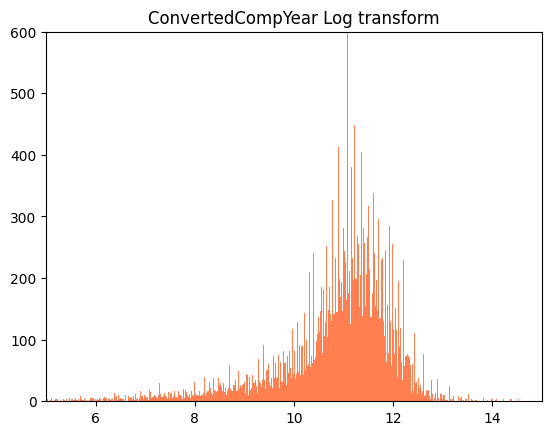

In [40]:
#histogram of log transform 'ConvertedCompYearly'
#optimise pour voir la distribution, connaissant le pic
dist1 =df['log_ConvertedCompYearly']
plt.hist(dist1, bins=800, color = 'coral')
plt.title('ConvertedCompYear Log transform')
plt.xlim([5,15])
plt.ylim([0, 600])  #faire un zoom de la distribution
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [44]:
print(df['YearsCodePro'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


In [45]:
print(df['YearsCodePro'].isnull().sum())

13827


In [46]:
# Remplacement des NaN par 'Unknown' 
df['YearsCodePro'] = df['YearsCodePro'].fillna('Unknown').astype(str)
print(df['YearsCodePro'].unique())

['Unknown' '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18'
 '37' '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26'
 '9' '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


In [49]:
df['YearsCodePro'].dtypes

dtype('O')

In [50]:
def experience(years):
    try:
        # Convertir les valeurs en nombres si possible
        years = float(years) if years not in ['Less than 1 year', 'More than 50 years', 'Unknown'] else years
    except ValueError:
        return 'Unknown'  # Classer les valeurs non convertibles comme 'Unknown'

    # Gestion des cas spécifiques (chaînes)
    if years == 'Less than 1 year':
        return 'Beginner'
    elif years == 'More than 50 years':
        return 'Expert'
    elif years == 'Unknown':
        return 'Unknown'

    # Gestion des valeurs numériques
    if years <= 2:
        return 'Beginner'
    elif 2 < years <= 5:
        return 'Intermediate'
    elif 5 < years <= 10:
        return 'Advanced'
    elif years > 10:
        return 'Expert'
    else:
        return 'Unknown'

# Appliquer la fonction
df['ExperienceLevel'] = df['YearsCodePro'].apply(experience)

# Vérification des catégories
print(df['ExperienceLevel'].value_counts())

ExperienceLevel
Expert          18460
Unknown         13827
Advanced        12653
Intermediate    10834
Beginner         9663
Name: count, dtype: int64


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
